In [140]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sy
g = 9.81
vms = 60.0
vmp = 5.0

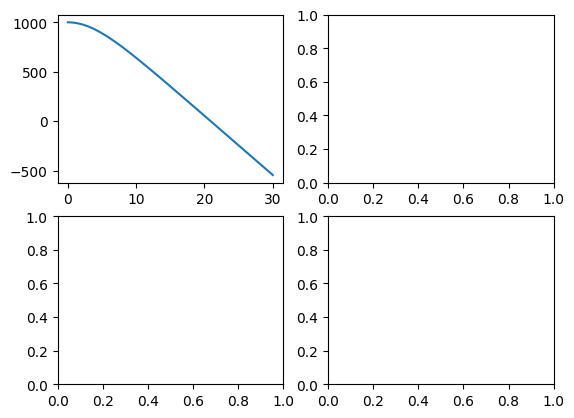

In [141]:
t= sy.symbols("t")
yt = -((vms**2)/g)*sy.log(sy.cosh((g*t)/vms)) + 1000
vy = sy.diff(yt, t)
at = -g + (g/(vms**2))*abs(vy)*vy

t_vals=np.linspace(0, 30, 1000)

vy_lam= sy.lambdify(t, vy, "numpy")
yt_lam= sy.lambdify(t, yt, "numpy")
at_lam= sy.lambdify(t, at, "numpy")
figure, axis = plt.subplots(2,2)
axis[0,0].plot(t_vals, yt_lam(t_vals))

In [142]:
tsolo = sy.nsolve(yt, t, 10) #tempo para y=0 sem paraquedas
vsolo = vy_lam(int(tsolo)) #velocidade para y=0 sem paraquedas
print(str(tsolo) + " segundos; ", str(vsolo) + " m/s")

20.8995190812588 segundos;  -59.826911404602896 m/s


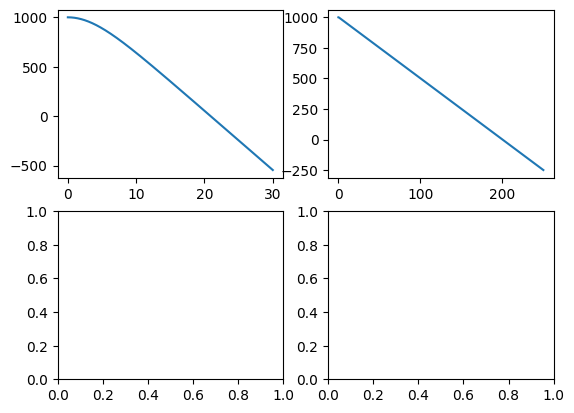

In [143]:
ytp = -((vmp**2)/g)*sy.log(sy.cosh((g*t)/vmp)) + 1000
vyp = sy.diff(ytp, t)
atp = -g + (g/(vmp**2))*abs(vyp)*vyp

t_vals_p=np.linspace(0, 250, 10000)

vyp_lam= sy.lambdify(t, vyp, "numpy")
ytp_lam= sy.lambdify(t, ytp, "numpy")
atp_lam= sy.lambdify(t, atp, "numpy")
axis[0,1].plot(t_vals_p, ytp_lam(t_vals_p))
figure

In [144]:
tsolo_p = sy.nsolve(ytp, t, 10) #tempo para y=0 com paraquedas
vsolo_p = vyp_lam(int(tsolo)) #velocidade para y=0 com paraquedas
print(str(tsolo_p) + " segundos; ", str(vsolo_p) + " m/s")

200.353286024750 segundos;  -5.0 m/s


In [145]:
y20s = yt_lam(20)
v20s = vy_lam(20)
print(y20s, v20s)

53.83623278196728 -59.826911404602896


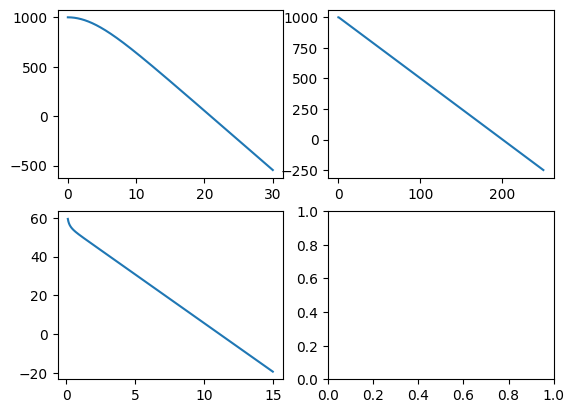

In [146]:
ytp2 = -((vmp**2)/g) * sy.log(sy.cosh((g * t) / vmp + sy.atanh(v20s / vmp))) + y20s
vyp2 = sy.diff(ytp2, t) #nao adicionar a velocidade 0 aqui, já está no yt
atp2 = -g + (g/(vmp**2))*abs(vyp2)*vyp2

t_vals_p2=np.linspace(0.1, 15, 10000)

vyp2_lam= sy.lambdify(t, vyp2, "numpy")
ytp2_lam= sy.lambdify(t, ytp2, "numpy")
atp2_lam= sy.lambdify(t, atp2, "numpy")
axis[1,0].plot(t_vals_p2, ytp2_lam(t_vals_p2))
figure

In [147]:
print(sy.nsolve(ytp2, t, 200))

11.1632287226222 - 0.800609748621252*I


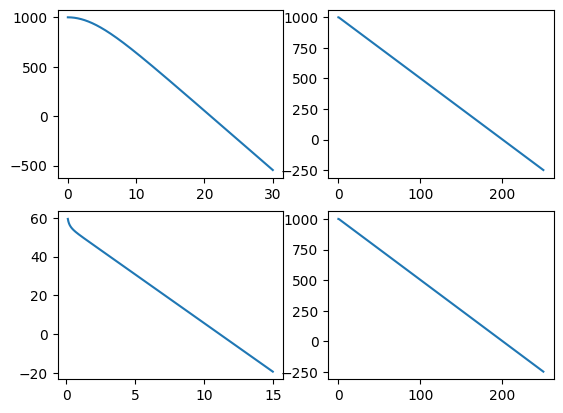

In [148]:
ytp3 = -((vmp**2)/g)*sy.log(sy.cosh((g*t)/vmp)) + 1000
ph = 1.225*sy.exp((-0.1378*(ytp3/1000)))
D= (g/(vmp**2)) * ph
vyp3 = sy.diff(ytp3, t)
atp3 = -g + (D)*abs(vyp3)*vyp3

t_vals_p=np.linspace(0, 250, 10000)

vyp3_lam= sy.lambdify(t, vyp3, "numpy")
ytp3_lam= sy.lambdify(t, ytp3, "numpy")
ph_lam = sy.lambdify(t, ph, "numpy")
D_lam = sy.lambdify(t, D, "numpy")
atp3_lam= sy.lambdify(t, atp3, "numpy")
axis[1,1].plot(t_vals_p, ytp_lam(t_vals_p))
figure

In [149]:
print(sy.nsolve(ytp3, t, 150))

200.353286024750
